In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from scipy import stats
import matplotlib.pyplot as plt

In [28]:
df_retention = pd.read_csv('employee_retention_data.csv')
df_retention.head(5)

employee_id  company_id              dept  seniority    salary   join_date  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
2     927315.0           4         marketing         14  101000.0  2014-10-13   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   

    quit_date  
0  2015-10-30  
1  2014-04-04  
2         NaN  
3  2013-06-07  
4  2014-08-22

In [29]:
df_retention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [30]:
print('Number of staying employees:\n', df_retention.isnull().sum())

Number of staying employees:
 employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64


In [31]:
# number of company in this dataset
np.unique(df_retention['company_id']).size

12

In [32]:
df_jointime = df_retention[['company_id','join_date']]
df_jointime['num_eployee_join'] = 1
df_jointime.rename(columns={'join_date':'date'}, inplace=True)
df_jointime.sort_values(by=['company_id','date'], ascending=[1, 1]).head(5)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


company_id        date  num_eployee_join
412            1  2011-01-24                 1
723            1  2011-01-24                 1
910            1  2011-01-24                 1
1593           1  2011-01-24                 1
1693           1  2011-01-24                 1

In [33]:
df_quittime = df_retention[['company_id','quit_date']]
df_quittime['num_eployee_quit'] = np.where(df_retention['quit_date'].isna(),0,-1)
df_quittime.rename(columns={'quit_date':'date'}, inplace=True)
df_quittime.sort_values(by=['company_id','date'], ascending=[1, 1]).tail(5)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


company_id date  num_eployee_quit
18421          12  NaN                 0
21235          12  NaN                 0
22512          12  NaN                 0
22829          12  NaN                 0
23747          12  NaN                 0

In [39]:
df_numemployee = df_jointime.append(df_quittime, ignore_index=True)
df_numemployee[['num_eployee_join','num_eployee_quit']]=df_numemployee[['num_eployee_join','num_eployee_quit']].fillna(0)
df_numemployee['employee_headcount'] = df_numemployee['num_eployee_join'] + df_numemployee['num_eployee_quit']
df_numemployee.sort_values(by=['company_id','date'], ascending=[1, 1]).head()

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


company_id        date  num_eployee_join  num_eployee_quit  \
412            1  2011-01-24               1.0               0.0   
723            1  2011-01-24               1.0               0.0   
910            1  2011-01-24               1.0               0.0   
1593           1  2011-01-24               1.0               0.0   
1693           1  2011-01-24               1.0               0.0   

      employee_headcount  
412                  1.0  
723                  1.0  
910                  1.0  
1593                 1.0  
1693                 1.0

In [40]:
df_numemployee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49404 entries, 0 to 49403
Data columns (total 5 columns):
company_id            49404 non-null int64
date                  38212 non-null object
num_eployee_join      49404 non-null float64
num_eployee_quit      49404 non-null float64
employee_headcount    49404 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [42]:
#Number of employee DAILY join and out for each company
df_numemployee_daily = df_numemployee.groupby(['company_id','date'], as_index=False).agg({"num_eployee_join": sum,
                                                                          "num_eployee_quit": sum,
                                                                          "employee_headcount": sum})
#.groupby(level=1).cumsum()

df_numemployee_daily['employee_headcount'] = np.cumsum(df_numemployee_daily['employee_headcount'])
df_numemployee_daily.head()


company_id        date  num_eployee_join  num_eployee_quit  \
0           1  2011-01-24              25.0               0.0   
1           1  2011-01-25               2.0               0.0   
2           1  2011-01-26               2.0               0.0   
3           1  2011-01-31              30.0               0.0   
4           1  2011-02-01               7.0               0.0   

   employee_headcount  
0                25.0  
1                27.0  
2                29.0  
3                59.0  
4                66.0

In [48]:
#Number of employee MONTHLY join and out for each company
df_numemployee_monthly = df_numemployee
df_numemployee_monthly['month'] = pd.DatetimeIndex(df_numemployee_monthly['date']).to_period("M") 
df_numemployee_monthly = df_numemployee_monthly.groupby(['company_id','month'], as_index=False).agg({"num_eployee_join": sum,
                                                                          "num_eployee_quit": sum,
                                                                          "employee_headcount": sum})
#.groupby(level=1).cumsum()

df_numemployee_monthly['employee_headcount'] = np.cumsum(df_numemployee_monthly['employee_headcount'])
df_numemployee_monthly.head()


company_id   month  num_eployee_join  num_eployee_quit  employee_headcount
0           1 2011-01              59.0               0.0                59.0
1           1 2011-02             119.0               0.0               178.0
2           1 2011-03             127.0               0.0               305.0
3           1 2011-04             139.0               0.0               444.0
4           1 2011-05             173.0               0.0               617.0

In [49]:
##Number of employee YEARLY join and out for each company
df_numemployee_yearly = df_numemployee
df_numemployee_yearly['year'] = pd.DatetimeIndex(df_numemployee_yearly['date']).to_period("Y") 
df_numemployee_yearly = df_numemployee_yearly.groupby(['company_id','year'], as_index=False).agg({"num_eployee_join": sum,
                                                                          "num_eployee_quit": sum,
                                                                          "employee_headcount": sum})
#.groupby(level=1).cumsum()
df_numemployee_yearly['employee_headcount'] = np.cumsum(df_numemployee_yearly['employee_headcount'])
df_numemployee_yearly.head()

company_id year  num_eployee_join  num_eployee_quit  employee_headcount
0           1 2011            1605.0             -12.0              1593.0
1           1 2012            1806.0            -604.0              2795.0
2           1 2013            1750.0           -1064.0              3481.0
3           1 2014            1712.0           -1377.0              3816.0
4           1 2015            1613.0           -1564.0              3865.0

In [59]:
current_working_date = pd.to_datetime(max(df_retention['quit_date'].dropna().max(),df_retention['join_date'].max()))

df_retention['working_time'] = np.where((abs(pd.to_datetime(df_retention['quit_date'])- 
                                 pd.to_datetime(df_retention['join_date'])).astype('timedelta64[ns]')).isna(),
                                       (current_working_date - pd.to_datetime(df_retention['join_date'])).astype('timedelta64[ns]'),
                                        (abs(pd.to_datetime(df_retention['quit_date'])- 
                                 pd.to_datetime(df_retention['join_date'])).astype('timedelta64[ns]'))) / np.timedelta64(1, 'D')
                                                                                          
df_retention.head()

employee_id  company_id              dept  seniority    salary   join_date  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
2     927315.0           4         marketing         14  101000.0  2014-10-13   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   

    quit_date  working_time  
0  2015-10-30         585.0  
1  2014-04-04         340.0  
2         NaN         423.0  
3  2013-06-07         389.0  
4  2014-08-22        1040.0

In [60]:
df_retention['working_time'].describe()

count    24702.000000
mean       572.959841
std        361.773152
min          0.000000
25%        333.000000
50%        423.000000
75%        780.000000
max       1774.000000
Name: working_time, dtype: float64

In [61]:
df_retention['had_quit'] = np.where(df_retention['quit_date'].isna(),0,1)

In [63]:
df_retention.sample(5)

employee_id  company_id              dept  seniority    salary  \
21845     952724.0           4  customer_service         29   94000.0   
19478     299520.0           8             sales          4   45000.0   
6118      903955.0           3  customer_service         13   66000.0   
2186      640326.0           6         marketing         25  173000.0   
16594     355608.0           2      data_science         18  294000.0   

        join_date   quit_date  working_time  had_quit  
21845  2015-08-24         NaN         108.0         0  
19478  2011-04-18  2013-03-22         704.0         1  
6118   2012-01-23  2013-03-22         424.0         1  
2186   2012-11-26  2014-12-04         738.0         1  
16594  2011-08-29  2012-08-31         368.0         1

In [74]:
df_model = df_retention[df_retention.columns.difference(
    ['join_date','employee_id','quit_date'])]
df_model.head()

company_id              dept  had_quit    salary  seniority  working_time
0           7  customer_service         1   89000.0         28         585.0
1           7         marketing         1  183000.0         20         340.0
2           4         marketing         0  101000.0         14         423.0
3           7  customer_service         1  115000.0         20         389.0
4           2      data_science         1  276000.0         23        1040.0

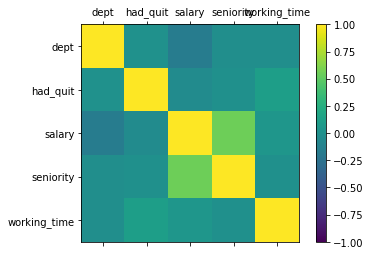

company_id  had_quit    salary  seniority  working_time
company_id      1.000000  0.013242 -0.163892  -0.010026     -0.009927
had_quit        0.013242  1.000000 -0.036561   0.000496      0.123081
salary         -0.163892 -0.036561  1.000000   0.559465      0.053736
seniority      -0.010026  0.000496  0.559465   1.000000      0.000744
working_time   -0.009927  0.123081  0.053736   0.000744      1.000000

In [75]:
import matplotlib.pyplot as plt

correlations = df_model.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = list(df_model)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

            company_id  had_quit
company_id                      
1                 8486      4621
2                 4222      2206
3                 2749      1531
4                 2062      1153
5                 1755       983
6                 1291       712
7                 1224       692
8                 1047       579
9                  961       529
10                 865       480
11                  16        12
12                  24        12


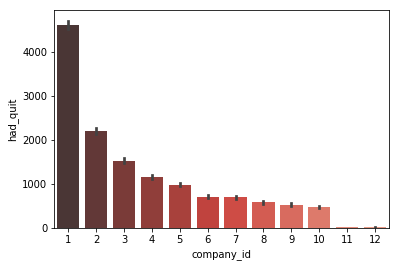

In [79]:
# Analyzing COMPANY_ID with "had_quit" classifier
print(df_model[['company_id','had_quit']].groupby(['company_id']).agg({"company_id": "size",
    "had_quit": "sum"}))
sns.barplot(x="company_id", y="had_quit", data=df_model[['company_id','had_quit']]
            , palette="Reds_d", estimator = sum)

                  dept  had_quit
dept                            
customer_service  9180      5094
data_science      3190      1682
design            1380       778
engineer          4613      2362
marketing         3167      1783
sales             3172      1811


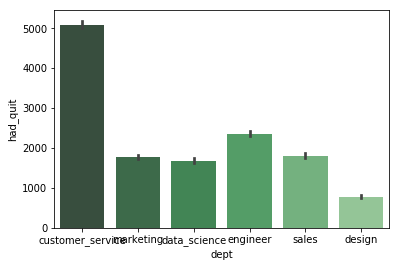

In [78]:
# Analyzing DEPARTMENT with had_quit classifier
print(df_model[['dept','had_quit']].groupby(['dept']).agg({"dept": "size",
    "had_quit": "sum"}))
sns.barplot(x="dept", y="had_quit", data=df_model[['dept','had_quit']]
            , palette="Greens_d", estimator = sum)

In [80]:
# Analyzing SENIORITY with had_quit classifier
print(df_model[['seniority','had_quit']].groupby(['seniority']).agg({"seniority": "size",
    "had_quit": "sum"}))
sns.barplot(x="seniority", y="had_quit", data=df_model[['seniority','had_quit']]
            , palette="Oranges_d", estimator = sum)

           seniority  had_quit
seniority                     
1                861       430
2                942       500
3                881       447
4                895       422
5                936       533
6                950       571
7                928       511
8               1008       586
9                944       522
10               927       523
11               924       512
12               988       583
13               894       500
14               920       508
15               911       505
16               936       534
17               893       478
18               872       457
19               910       497
20               844       469
21               782       455
22               764       405
23               785       430
24               743       398
25               715       403
26               694       359
27               642       342
28               585       320
29               626       308
98                 1         1
99      

In [81]:
# remove outliner
df_model = df_model[df_model['seniority'] != 98]
df_model = df_model[df_model['seniority'] != 99]

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [96]:
# splitting dataframe
y = df_model['had_quit']
X = df_model.drop(['had_quit'],axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype('float')
y_test = y_test.astype('float')

In [92]:
# Endcoding the categorical features and getting the dummies matrix
pd.get_dummies(X_train, prefix=['company_id', 'dept'], columns=['company_id', 'dept']).head()

salary  seniority  working_time  company_id_1  company_id_2  \
10422   66000.0          6         535.0             0             0   
7341    76000.0          4         787.0             0             1   
3015   190000.0          5         807.0             1             0   
8151    53000.0          2         739.0             0             1   
17900  166000.0          5         640.0             0             0   

       company_id_3  company_id_4  company_id_5  company_id_6  company_id_7  \
10422             1             0             0             0             0   
7341              0             0             0             0             0   
3015              0             0             0             0             0   
8151              0             0             0             0             0   
17900             0             0             1             0             0   

          ...      company_id_9  company_id_10  company_id_11  company_id_12  \
10422     ...                 0              0              0              0   
7341      ...                 0              0              0              0   
3015      ...                 0              0              0              0   
8151      ...                 0              0              0              0   
17900     ...                 0              0              0              0   

       dept_customer_service  dept_data_science  dept_design  dept_engineer  \
10422                      1                  0            0              0   
7341                       0                  0            0              1   
3015                       0                  0            0              1   
8151                       0                  0            0              0   
17900                      0                  1            0              0   

       dept_marketing  dept_sales  
10422               0           0  
7341                0           0  
3015                0           0  
8151                0           1  
17900               0           0  

[5 rows x 21 columns]

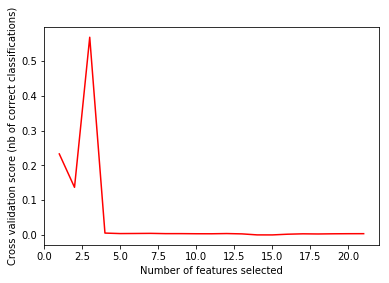

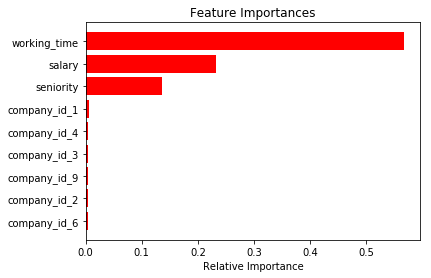

In [97]:
# Feature Importance
forest = RandomForestClassifier(n_estimators=30)
X_train=pd.get_dummies(X_train, prefix=['company_id', 'dept'], columns=['company_id', 'dept'])
forest.fit(X_train,y_train)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(forest.feature_importances_) + 1), forest.feature_importances_, color='r')
plt.show()

features = X_train.columns
importances = forest.feature_importances_
nSelectedFeature = 10
indices = np.argsort(importances)[-(nSelectedFeature-1):]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[ 2  3  1  4 11  7  6  9 16 14 19 12 17 20 21 18  5 15 13 10  8]
[0.86714332 0.75362293 0.7282657  0.75504357 0.73923258 0.72895785
 0.72455414 0.71731897 0.73011838 0.72475321 0.71742712 0.72087997
 0.71256387 0.71043499 0.70763164 0.71733888 0.7150042  0.71267796
 0.71104359 0.70748233 0.70808498]


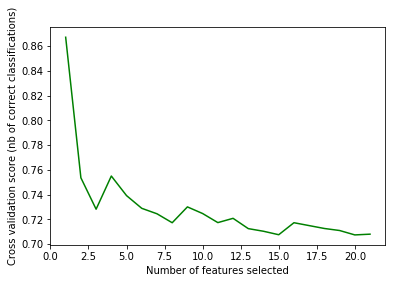

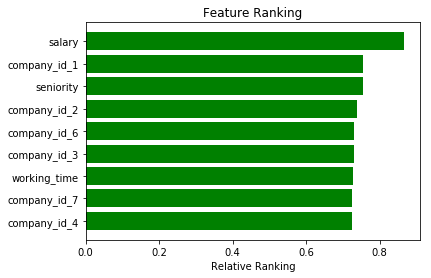

In [99]:
# With 5-crossvalidation
rfe_forest = RFECV(RandomForestClassifier(n_estimators=30), cv=StratifiedKFold(5), scoring='f1_weighted')
rfe_forest.fit(X_train, y_train)

rankinfo = rfe_forest.grid_scores_
print(rfe_forest.ranking_) 
print(rankinfo)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfe_forest.grid_scores_) + 1), rfe_forest.grid_scores_, color='g')
plt.show()

features = X_train.columns
nSelectedFeature = 10
indices = np.argsort(rankinfo)[-(nSelectedFeature-1):]
plt.title('Feature Ranking')
plt.barh(range(len(indices)), rankinfo[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Ranking')
plt.show()

[3.13775458e+01 2.64567983e-01 3.17270930e+02 1.45623359e-01
 8.87785885e+00 1.13945016e+00 2.97596300e-01 3.37101491e-01
 2.44444435e-01 8.59000047e-01 2.37802663e+00 7.63004692e-03
 2.75131579e-03 5.51445501e+00 2.60200207e-02 6.59830851e+00
 4.85695882e+00 5.16715978e-01 2.30703992e+01 3.37739845e+00
 2.96979387e+00]


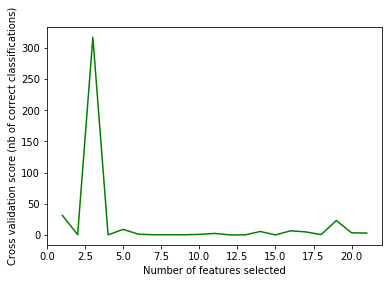

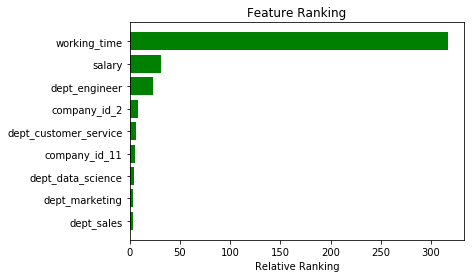

In [100]:
# f_classif() Compute the ANOVA F-value for the provided sample.
from sklearn.feature_selection import f_classif
ffs = f_classif(X_train,y_train)
rankinfo = ffs[0]
print(rankinfo)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(ffs[0]) + 1), ffs[0], color='g')
plt.show()

features = X_train.columns
nSelectedFeature = 10
indices = np.argsort(rankinfo)[-(nSelectedFeature-1):]
plt.title('Feature Ranking')
plt.barh(range(len(indices)), rankinfo[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Ranking')
plt.show()

### The main factors that drive employee churn is working time, salary and seniority